# 四幅

In [59]:
import skimage
import numpy as np
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [60]:
def listImages(name_list, path, as_grey=True):
	"""Gives a list of 200*200 Gray-Scale images whose names are specified by name_list"""
	image_list = []

	for name in name_list:
		image = io.imread("C:/Users/DDM/Desktop/Term1/neturalnetwork/data/test/" + path + "/" + name + ".bmp", as_grey=as_grey)
		if as_grey is True:
			image = resize(image, (112, 92))
		image_list.append(image)

	return image_list

In [61]:
def plotImages(image_list, name_list, path, as_grey, toSave=False):
    """Plots the images given in image_list side by side."""

    fig = plt.figure()
    imageCoordinate = 100 + 10*len(image_list) + 1
    i = 0

    for image in image_list:
        fig.add_subplot(imageCoordinate)
        plt.title(name_list[i])
        plt.axis('off')
        plt.imshow(image)
        if as_grey:
            plt.set_cmap('gray')
        imageCoordinate += 1
        i += 1
    if toSave:
        plt.savefig("C:/Users/DDM/Desktop/Term1/neturalnetwork/data/test/" + path + "/" + name_list[i] + ".png",bbox_inches='tight')
        
    plt.show()

In [62]:
def saveImages(image_list, name_list, path):
	"""Saves the list of images in the folder specified by path"""
	i = 0
	for image in image_list:
		name = name_list[i]
		io.imsave(path + "/" + name + ".bmp", image)
		i += 1

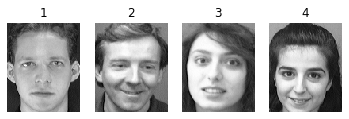

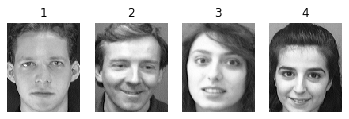

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [63]:
names = ["1", "2", "3","4"]
images = listImages(names, "original", False)

# Plot the orginal images which are colored
plotImages(images, names, "original", False)

# Plot the images after they are resized and converted to black and white
images = listImages(names, "original", True)
plotImages(images, names, "bnw", True, False)
saveImages(images,names,"C:/Users/DDM/Desktop/Term1/neturalnetwork/data/test/bnw")
# Save the black and white images in ./images/bnw
# Uncomment the below line to save the images
# utl.saveImages(images, names, "bnw")


In [64]:
def mixImages(image_list, weights):
	""" Returns a image mixed in proportion with the ratios given by weights."""
	size = image_list[0].shape
	mixImage = np.zeros(size)
	i = 0
	for image in image_list:
		mixImage += image*weights[i]
		i += 1

	return mixImage 

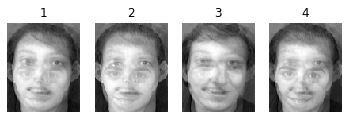

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [77]:
names = ["1", "2", "3","4"]
images = listImages(names, "original", True)

# Getting mixed images
image1 = mixImages(images, [0.23, 0.14, 0.35,0.2])
image2 = mixImages(images, [0.32, 0.05, 0.17,0.22])
image3 = mixImages(images, [0.07, 0.31, 0.25,0.09])
image4 = mixImages(images, [0.11, 0.12, 0.1,0.18])

# Plot the mixed images
mnames = ["1", "2", "3","4"]
mimages = [image1, image2, image3,image4]
plotImages(mimages, mnames, "mixed", True, False)
saveImages(mimages,mnames,"C:/Users/DDM/Desktop/Term1/neturalnetwork/data/test/mixed")

In [71]:
def g1(u):
	return np.tanh(u)

def g1_dash(u):
	d = g1(u)
	return 1 - d*d

def g2(u):
	return u*np.exp(-(u*u)/2)

def g2_dash(u):
	return (1 - u*u)*np.exp(-(u*u)/2)

def g3(u):
	return 1/(1 + np.exp(-u))

def g3_dash(u):
	d = g3(u)
	return d*(1 - d)

def g4(u):
	return u*u*u

def g4_dash(u):
	return 3*u*u

def FastICA(X, vectors, eps):
	"""FastICA technique is used.
	The function returns one independent component.
	X is assumed to be centered and whitened.
	The paper by A. Hyvarinen and E. Oja is in itself the best resource out there for it.
	Independent Component Analysis:Algorithms and Applications - A. Hyvarinen and E. Oja
	"""
	# The size of w1 is determined by the number of images
	size = X.shape[0]
	n = X.shape[1]
	# Initial weight vector
	w1 = np.random.rand(size)
	w2 = np.random.rand(size)
	# Making the vector of unit norm
	w1 = w1/np.linalg.norm(w1)
	w2 = w2/np.linalg.norm(w2)

	while( np.abs(np.dot(w1.T,w2)) < (1 - eps)):
		w1 = w2
		# first is E{xg(W.T*x)} term
		first = np.dot(X, g3(np.dot(w2.T, X)))/n
		# second is E{g_dash(W.T*x)}*W term
		second = np.mean(g3_dash(np.dot(w2.T, X)))*w2
		# Update step
		w2 = first - second
		# Using Gram-Schmidt deflation to decorelate the vectors
		w3 = w2
		for vector in vectors:
			w3 = w3 - np.dot(w2.T, vector)*vector
		w2 = w3
		w2 = w2/np.linalg.norm(w2)

	return w1

In [72]:
def whitenMatrix(matrix):
    """Whitening tranformation is applied to the images given as a matrix"""
    """The transformation for the matrix X is given by E*D^(-1/2)*transpose(E)*X"""
    """Where D is a diagonal matrix containing eigen values of covariance matrix of X"""
    """E is the matrix containing eigen vectors of covariance matrix of X"""
    # Covariance matrix is approximated by this
    covMatrix = np.dot(matrix, matrix.T)/matrix.shape[1]

    # Doing the eigen decomposition of cavariance matrix of X 
    eigenValue, eigenVector = np.linalg.eigh(covMatrix)
    # Making a diagonal matrix out of the array eigenValue
    diagMatrix = np.diag(eigenValue)
    # Computing D^(-1/2)
    invSqrRoot = np.sqrt(np.linalg.pinv(diagMatrix))
    # Final matrix which is used for transformation
    whitenTrans = np.dot(eigenVector,np.dot(invSqrRoot, eigenVector.T))
    # whiteMatrix is the matrix we want after all the required transformation
    # To verify, compute the covvariance matrix, it will be approximately identity
    whiteMatrix = np.dot(whitenTrans, matrix)

    # print np.dot(whiteMatrix, whiteMatrix.T)/matrix.shape[1]

    return whiteMatrix

In [73]:
def matrix2list(matrix):
    """Converts the matrix into a list of images.
    Considering each row of the matrix to be a image"""
    image_list = []
    for row in matrix:
        image = np.reshape(row, (112, 92))
        image_list.append(image)

    return image_list

In [74]:
def list2matrix(image_list):
    """Converts the image into a vector and 
    stacks the vectors to form a matirx of size (no of images)*(width*height)"""
    flatten_list = []
    for image in image_list:
        flatten_list.append(image.ravel())

    matrix = np.vstack(flatten_list)

    return matrix

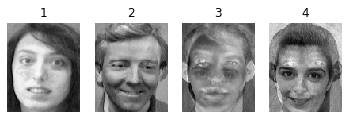

Lossy conversion from float64 to uint8. Range [-1.8356360811304093, 1.7980866579103993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-2.8451374247902255, 3.03644657211407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-3.567142697804427, 3.707928170959536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-2.619060834494586, 2.76925699895318]. Convert image to uint8 prior to saving to suppress this warning.


In [78]:
np.random.seed(7)

eps = 0.00000001

# Read the images from ./images/mixed
names = ["1", "2", "3","4"]
images = listImages(names, "mixed")

# The images are mean centered
centImages = []
for image in images:
	rescaleImage = image
	centImage = rescaleImage - np.mean(rescaleImage)
	centImages.append(centImage)

# The images are whitened, the helper function is in utilities.py
whiteImages = whitenMatrix(list2matrix(centImages))

# Uncomment the lines below to plot the images after whitening
# utl.plotImages(utl.matrix2list(whiteImages), names, "../white_tranform", True, False)

# The images are now converted into time series data
# X is a 3*image_size matrix, with each row representing a image
X = whiteImages

# Find the individual components one by one
vectors = []
for i in range(0, len(images)):
	vector = FastICA(X, vectors, eps)
	# print vector
	vectors.append(vector)

# Stack the vectors to form the unmixing matrix
W = np.vstack(vectors)

# Get the original matrix
S = np.dot(W, whiteImages)

# Get the unmixed images
uimages = matrix2list(S)

plotImages(uimages, names, "fastica", True, False)
saveImages(uimages, names, "C:/Users/DDM/Desktop/Term1/neturalnetwork/data/test/after/fastica")

# 五幅

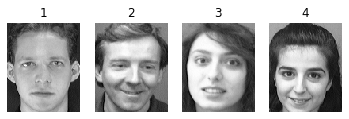

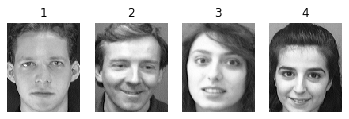

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [4]:
import skimage
import numpy as np
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
def listImages(name_list, path, as_grey=True):
	"""Gives a list of 200*200 Gray-Scale images whose names are specified by name_list"""
	image_list = []

	for name in name_list:
		image = io.imread("C:/Users/DDM/Desktop/Term1/neturalnetwork/data/test/" + path + "/" + name + ".bmp", as_grey=as_grey)
		if as_grey is True:
			image = resize(image, (112, 92))
		image_list.append(image)

	return image_list

def plotImages(image_list, name_list, path, as_grey, toSave=False):
    """Plots the images given in image_list side by side."""

    fig = plt.figure()
    imageCoordinate = 100 + 10*len(image_list) + 1
    i = 0

    for image in image_list:
        fig.add_subplot(imageCoordinate)
        plt.title(name_list[i])
        plt.axis('off')
        plt.imshow(image)
        if as_grey:
            plt.set_cmap('gray')
        imageCoordinate += 1
        i += 1
    if toSave:
        plt.savefig("C:/Users/DDM/Desktop/Term1/neturalnetwork/data/test/" + path + "/" + name_list[i] + ".png",bbox_inches='tight')
        
    plt.show()
    
def saveImages(image_list, name_list, path):
	"""Saves the list of images in the folder specified by path"""
	i = 0
	for image in image_list:
		name = name_list[i]
		io.imsave(path + "/" + name + ".bmp", image)
		i += 1
 
def mixImages(image_list, weights):
	""" Returns a image mixed in proportion with the ratios given by weights."""
	size = image_list[0].shape
	mixImage = np.zeros(size)
	i = 0
	for image in image_list:
		mixImage += image*weights[i]
		i += 1

	return mixImage 



def whitenMatrix(matrix):
	"""Whitening tranformation is applied to the images given as a matrix"""
	"""The transformation for the matrix X is given by E*D^(-1/2)*transpose(E)*X"""
	"""Where D is a diagonal matrix containing eigen values of covariance matrix of X"""
	"""E is the matrix containing eigen vectors of covariance matrix of X"""
	# Covariance matrix is approximated by this
	covMatrix = np.dot(matrix, matrix.T)/matrix.shape[1]

	# Doing the eigen decomposition of cavariance matrix of X 
	eigenValue, eigenVector = np.linalg.eigh(covMatrix)
	# Making a diagonal matrix out of the array eigenValue
	diagMatrix = np.diag(eigenValue)
	# Computing D^(-1/2)
	invSqrRoot = np.sqrt(np.linalg.pinv(diagMatrix))
	# Final matrix which is used for transformation
	whitenTrans = np.dot(eigenVector,np.dot(invSqrRoot, eigenVector.T))
	# whiteMatrix is the matrix we want after all the required transformation
	# To verify, compute the covvariance matrix, it will be approximately identity
	whiteMatrix = np.dot(whitenTrans, matrix)

	# print np.dot(whiteMatrix, whiteMatrix.T)/matrix.shape[1]

	return whiteMatrix



def matrix2list(matrix):
	"""Converts the matrix into a list of images.
	Considering each row of the matrix to be a image"""
	image_list = []
	for row in matrix:
		image = np.reshape(row, (112, 92))
		image_list.append(image)

	return image_list




def list2matrix(image_list):
	"""Converts the image into a vector and 
	stacks the vectors to form a matirx of size (no of images)*(width*height)"""
	flatten_list = []
	for image in image_list:
		flatten_list.append(image.ravel())

	matrix = np.vstack(flatten_list)

	return matrix


def g1(u):
	return np.tanh(u)

def g1_dash(u):
	d = g1(u)
	return 1 - d*d

def g2(u):
	return u*np.exp(-(u*u)/2)

def g2_dash(u):
	return (1 - u*u)*np.exp(-(u*u)/2)

def g3(u):
	return 1/(1 + np.exp(-u))

def g3_dash(u):
	d = g3(u)
	return d*(1 - d)

def g4(u):
	return u*u*u

def g4_dash(u):
	return 3*u*u

def FastICA(X, vectors, eps):
	"""FastICA technique is used.
	The function returns one independent component.
	X is assumed to be centered and whitened.
	The paper by A. Hyvarinen and E. Oja is in itself the best resource out there for it.
	Independent Component Analysis:Algorithms and Applications - A. Hyvarinen and E. Oja
	"""
	# The size of w1 is determined by the number of images
	size = X.shape[0]
	n = X.shape[1]
	# Initial weight vector
	w1 = np.random.rand(size)
	w2 = np.random.rand(size)
	# Making the vector of unit norm
	w1 = w1/np.linalg.norm(w1)
	w2 = w2/np.linalg.norm(w2)

	while( np.abs(np.dot(w1.T,w2)) < (1 - eps)):
		w1 = w2
		# first is E{xg(W.T*x)} term
		first = np.dot(X, g3(np.dot(w2.T, X)))/n
		# second is E{g_dash(W.T*x)}*W term
		second = np.mean(g3_dash(np.dot(w2.T, X)))*w2
		# Update step
		w2 = first - second
		# Using Gram-Schmidt deflation to decorelate the vectors
		w3 = w2
		for vector in vectors:
			w3 = w3 - np.dot(w2.T, vector)*vector
		w2 = w3
		w2 = w2/np.linalg.norm(w2)

	return w1


names = ["1", "2", "3","4"]
images = listImages(names, "original", False)

# Plot the orginal images which are colored
plotImages(images, names, "original", False)

# Plot the images after they are resized and converted to black and white
images = listImages(names, "original", True)
plotImages(images, names, "bnw", True, False)
saveImages(images,names,"C:/Users/DDM/Desktop/Term1/neturalnetwork/data/test/bnw")
# Save the black and white images in ./images/bnw
# Uncomment the below line to save the images
# utl.saveImages(images, names, "bnw")

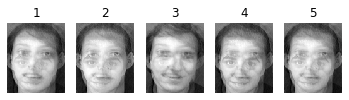

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [5]:
names = ["1", "2", "3","4"]
images = listImages(names, "original", True)

# Getting mixed images
image1 = mixImages(images, [0.23, 0.14, 0.35, 0.2])
image2 = mixImages(images, [0.32, 0.05, 0.17, 0.22])
image3 = mixImages(images, [0.07, 0.31, 0.25, 0.09])
image4 = mixImages(images, [0.11, 0.12, 0.10, 0.18])
image5 = mixImages(images, [0.22, 0.17, 0.18, 0.21])

# Plot the mixed images
mnames = ["1", "2", "3","4","5"]
mimages = [image1, image2, image3, image4,image5 ]
plotImages(mimages, mnames, "mixed", True, False)
saveImages(mimages,mnames,"C:/Users/DDM/Desktop/Term1/neturalnetwork/data/test/mixed")

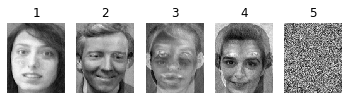

Lossy conversion from float64 to uint8. Range [-1.825265881742991, 1.8007310061397315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-2.8300929292975945, 3.020403652636585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-3.5469563437457885, 3.736837335285982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-2.6241753775572088, 2.749628546534493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-2.9251447705533993, 2.8547115568518486]. Convert image to uint8 prior to saving to suppress this warning.


In [6]:
np.random.seed(7)

eps = 0.00000001

# Read the images from ./images/mixed
names = ["1", "2", "3","4","5"]
images = listImages(names, "mixed")

# The images are mean centered
centImages = []
for image in images:
	rescaleImage = image
	centImage = rescaleImage - np.mean(rescaleImage)
	centImages.append(centImage)

# The images are whitened, the helper function is in utilities.py
whiteImages = whitenMatrix(list2matrix(centImages))

# Uncomment the lines below to plot the images after whitening
# utl.plotImages(utl.matrix2list(whiteImages), names, "../white_tranform", True, False)

# The images are now converted into time series data
# X is a 3*image_size matrix, with each row representing a image
X = whiteImages

# Find the individual components one by one
vectors = []
for i in range(0, len(images)):
	vector = FastICA(X, vectors, eps)
	# print vector
	vectors.append(vector)

# Stack the vectors to form the unmixing matrix
W = np.vstack(vectors)

# Get the original matrix
S = np.dot(W, whiteImages)

# Get the unmixed images
uimages = matrix2list(S)

plotImages(uimages, names, "fastica", True, False)
saveImages(uimages, names, "C:/Users/DDM/Desktop/Term1/neturalnetwork/data/test/after/fastica")

# 三幅




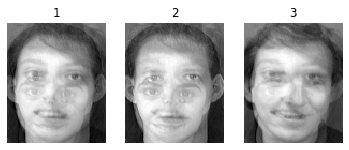

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [7]:
names = ["1", "2", "3","4"]
images = listImages(names, "original", True)

# Getting mixed images
image1 = mixImages(images, [0.23, 0.14, 0.35, 0.2])
image2 = mixImages(images, [0.32, 0.05, 0.17, 0.22])
image3 = mixImages(images, [0.07, 0.31, 0.25, 0.09])


# Plot the mixed images
mnames = ["1", "2", "3"]
mimages = [image1, image2, image3]
plotImages(mimages, mnames, "mixed", True, False)
saveImages(mimages,mnames,"C:/Users/DDM/Desktop/Term1/neturalnetwork/data/test/mixed")

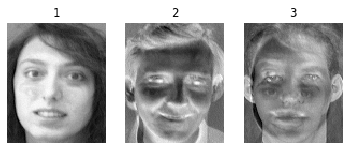

Lossy conversion from float64 to uint8. Range [-1.8415651737238468, 1.7600965247876355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-3.008070129258017, 2.769825626475162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-3.487168114387533, 3.6224714720789497]. Convert image to uint8 prior to saving to suppress this warning.


In [8]:
np.random.seed(7)

eps = 0.00000001

# Read the images from ./images/mixed
names = ["1", "2", "3"]
images = listImages(names, "mixed")

# The images are mean centered
centImages = []
for image in images:
	rescaleImage = image
	centImage = rescaleImage - np.mean(rescaleImage)
	centImages.append(centImage)

# The images are whitened, the helper function is in utilities.py
whiteImages = whitenMatrix(list2matrix(centImages))

# Uncomment the lines below to plot the images after whitening
# utl.plotImages(utl.matrix2list(whiteImages), names, "../white_tranform", True, False)

# The images are now converted into time series data
# X is a 3*image_size matrix, with each row representing a image
X = whiteImages

# Find the individual components one by one
vectors = []
for i in range(0, len(images)):
	vector = FastICA(X, vectors, eps)
	# print vector
	vectors.append(vector)

# Stack the vectors to form the unmixing matrix
W = np.vstack(vectors)

# Get the original matrix
S = np.dot(W, whiteImages)

# Get the unmixed images
uimages = matrix2list(S)

plotImages(uimages, names, "fastica", True, False)
saveImages(uimages, names, "C:/Users/DDM/Desktop/Term1/neturalnetwork/data/test/after/fastica")